# Convolutional Neural Networks
A convolutional neural network is a class of neural network which specializes in processing data that has a grid-like topology such as an image. 

A digital image consists of a series of pixels arranged in a grid. Each pixel contains a value to denote how bright it should be. The conventional RGB representation of a digital image consists of 3 'channels' for colours: red, green and blue. These channels represent 3 separate images. These images are mixed in the final image.


### 2D Convolutions

Kernel: a 2D matrix which acts as a filter, it gets applied to the input data through a process called convolution

Given a 2D image $I$ of size $H \times W$ (Height $\times$ Width) and a 2D kernel $K$ of size $h \times w$, the 2D convolution $C$ at each position $(i, j)$ is computed as:
$$ C(i,j) = \sum_{m=0}^{h-1} \sum_{n=0}^{w-1} I(i+m, j+n) \cdot K(m,n)$$

See the following diagram for a visual explanation of the formula:

<img src="2d_convolution.WEBP" width="750" align="center">
    
Notice how the convolution output (also referred to as activation or feature map) is smaller than the original image (has fewer pixel cells - convolutions don't change the size of the pixel cells). This image compression can be desirable for many CNN tasks. Though, to avoid this compression we can apply '0 padding' has shown in the following gif:
    
<img src="padded_convolution.gif" width="750" align="center">

Stride: number of cells (pixels) by which the kernel is moved across the input image during the convolution operation. A larger stride value leads further compression by a reduction in the size of the convolution image.

<img src="stride_2.gif" width="750" align="center">

If we have an input size $I_{size}$, kernel size $K_{size}$ with stride $S$ and amount of padding $P$, then the size of the convolution output $C_{size}$ is:
$$C_{size} = \frac{I_{size} - K_{size} + 2P}{S}+1$$

#### What is the purpose of a convolution?

Convolutions can highlight certain abstract features within an image. The code below demonstrates some common convolution kernels. 



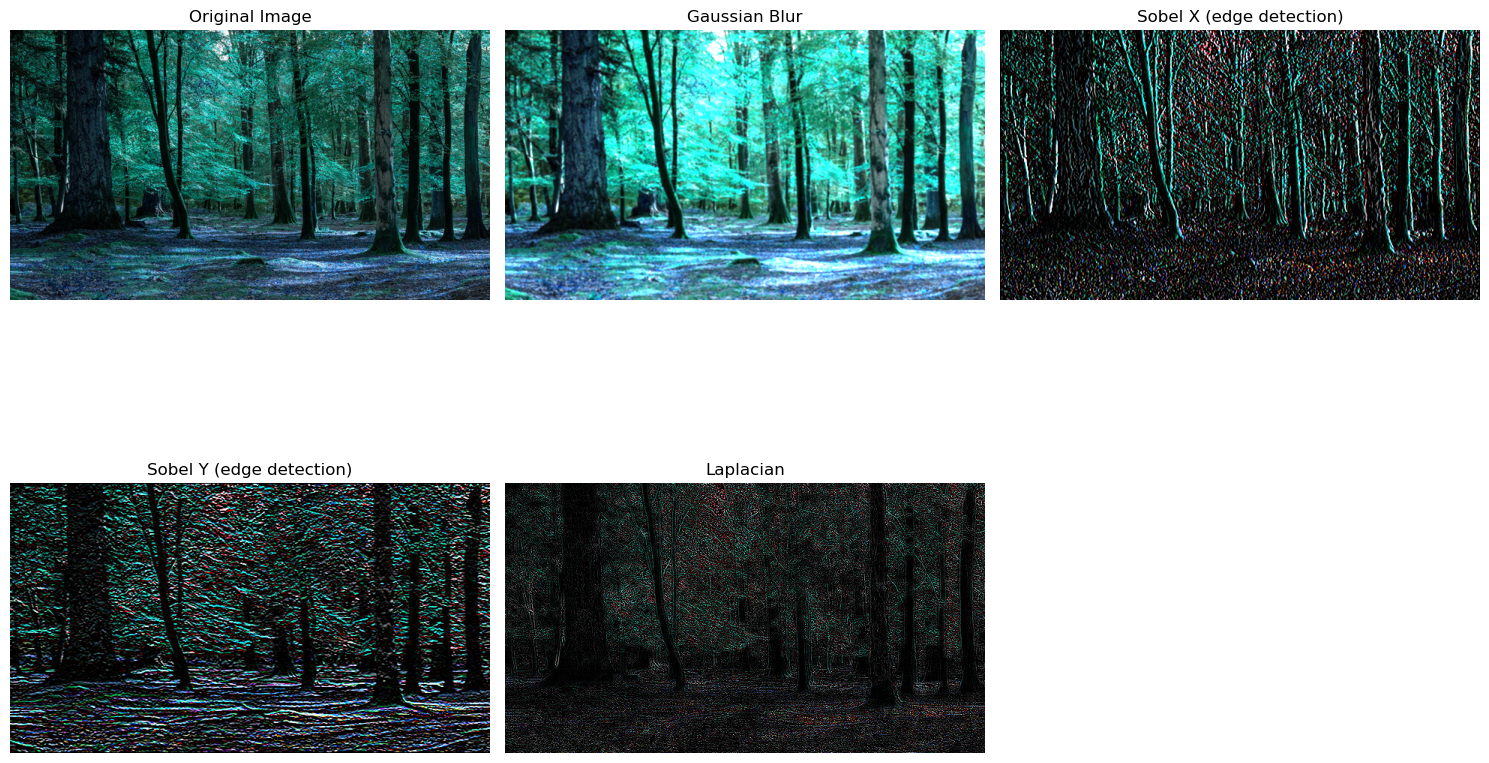

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('woods.jpg')


'''
    The gaussian kernel blurs an image. 
    It has all positive weights that average the values of a pixel with its neighbors, smoothing out the image.
'''
gaussian_kernel = np.array([[1, 2, 1],
                             [2, 4, 2],
                             [1, 2, 1]]) / 8
'''
    The sobel kernel highlights edges. 
    Depending on which axes to focus on, the kernel will have positive weights on one side and negative weights 
    on the other, highlighting areas of the image where intensity changes sharply.
    
'''
sobel_kernel_x = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

sobel_kernel_y = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])

# Laplacian Kernel sharpens an image
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

# Apply convolution with each kernel
gaussian_blur = cv2.filter2D(image, -1, gaussian_kernel)
sobel_x = cv2.filter2D(image, -1, sobel_kernel_x)
sobel_y = cv2.filter2D(image, -1, sobel_kernel_y)
laplacian = cv2.filter2D(image, -1, laplacian_kernel)

# Display images one by one
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(gaussian_blur)
plt.title('Gaussian Blur')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(sobel_x)
plt.title('Sobel X (edge detection)')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(sobel_y)
plt.title('Sobel Y (edge detection)')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(laplacian)
plt.title('Laplacian')
plt.axis('off')

plt.tight_layout()
plt.show()


## 2D Convolutions in Neural Networks

#### Why aren't MLPs used for computer vision?
Suppose we have a dataset of 516 x 516 pixel images, with some images capturing a cat. The naive approach to building a neural network capable of binary classification on these images (classifying cat or not cat) would be to use an MLP and have a weight connecting each input layer node (pixel) to a node in the hidden layer (see image below). This requires far too many weights. Additionally, it will associate features with specific spatial locations on the image, rather than learning to identify a cat as a distinct object which can reside in any location on the image. If our dataset has no images of a cat sitting in the top right corner of the image, then the MLP classifier will learn that cats never sit in the top right corner of images. MLPs are not 'translation invariant'.

<p style="text-align:center;">Naive MLP</p>

<img src="naive_mlp.png" width="200" align="center">

### Convolutions instead
When we treat convolution kernels as learnable weights (parameters), this enables neural networks to learn to identify visual features that are 'translation-invariant'. By sharing parameters (weights) across different spatial locations, convolutions capture patterns irrespective of their position in the image. This property allows CNNs to recognize objects regardless of their location within the image.

<p style="text-align:center;">Convolutional Layer</p>

<img src="cnn_compare_mlp.png" width="250" align="center">

Think of each kernel as a learnable function capable extracting specific features of interest from our image. One kernel might learn to extract features pertaining to eyes, another kernel might extract features relating to ears. Although, realistically feature maps (CNN layer outputs) represent much more abstract features like this:

<p style="text-align:center;">Abstract CNN feature maps</p>

<img src="cnn_feature_maps.png" width="500" align="center">

## 2D CNN

CNNs often consist of multiple convolutional layers followed by multiple fully connected layers:

<img src="cnn_multi_layer.jpg" width="900" align="center">

The first convolutional layer learns to extract features from the input image - in the form of feature maps. Hidden convolutional layers will then learn to extract features from feature maps - in the form of even more abstract feature maps. Typically an MLP is implemented in the final layers, operating on translation invariant feature maps with much smaller dimension to produce an appropriately structured output.

###### A convolutional layer which only outputs one channel
To understand how a convolutional layer works we will describe one which outputs a single channel, though convolutional layers are typically designed to output multiple channels. A convolutional layer with only one channel in its output will only use a single kernel. Suppose our input is a 3-channel RGB image. We apply the same kernel to each of the 3 input channels separately obtaining 3 convolution images. We then perform pointwise addition on these 3 convolutions to obtain the single-channel feature map output. 

###### A convolutional layer which outputs multiple channels

Typically convolutional layers will involve multiple identically sized kernels. Each kernel is being taught to extract different features from the input. For each kernel the layer will output a separate channel - feature maps. 

We can formalize a convolutional layer. We have tensors $input$, $output$, $kernel$ and kernel operation $*$

$$out_i = \sum_{k=1}^{C_{in}} kernel_i * input_k \text{   , for  } i = 1,...,C_{out}$$ 
* $input$ has the shape $(C_{in}, H_{in}, W_{in})$
   * $C_{in}$: the number of input channels
   * $H_{in}$,$W_{out}$: height and width of the input image in pixels
* $output$ has the shape $(C_{out}, H_{out}, W_{out})$
   * remember that $H_{out}$ and $W_{out}$ is determined by the size and stride of the kernel and whether we decide to use padding or not
* $kernel$ has the shape $(H_{kernel}, W_{kernel})$
   * There are $C_{out}$ different kernels
   
   
###### Final MLP layers and translation invariance

It might seem like the use of MLP layers (fully connected layers) at the end of the CNN contradicts what we've said about how MLPs are not suitable for computer vision. However, by the time the data reaches the flattening step, the convolutional layers are expected to have condensed the input into highly abstract features that can represent the presence (or absence) of specific attributes regardless of their original positions.

### Pooling

Pooling layers are commonly used to further compress our feature maps, while retaining the most important information. Similar to convolutions, we apply pooling over the image in a sliding window fashion. But instead of applying a dot product with a kernel matrix, we apply a simple operation like returning the maximum of the numbers in the sliding window (max pooling) or return the average of the numbers in the sliding window (average pooling). 
<img src="max_pooling2d.png" width="900" align="center">

### PyTorch CNN for Image Classification

The following code builds, trains and evaluates a CNN for image classification on the CIFAR-10 dataset. It consists of 60,000 color images in 10 classes (6,000 images per class). Each image is 32x32 pixels. We only use a subset of 7000 images in this example. 

In [2]:
#FYI the following cell will download 177MB of data to your current working directory
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Subset
import random

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Transformations
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


# Training set
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
# Test set
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

# Wont use the whole dataset because it's too big
train_subset_size = 6000
test_subset_size = 1000

def get_subset_dataset(dataset, sub_size):
    # Create a list of indices for the subset
    indices = list(range(len(dataset)))
    random.shuffle(indices)  # shuffle the indices randomly
    subset_indices = indices[:sub_size]  # select the first subset_size indices
    
    return Subset(dataset, subset_indices)

#just comment these 2 lines out if you want to use the whole dataset
trainset = get_subset_dataset(trainset, train_subset_size)
testset = get_subset_dataset(testset, test_subset_size)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 32, kernel_size=5, stride=1, padding=2)
        # conv1 takes 3-channel RGB images as input, outputs 32-channel feature maps (learns 32 5x5 kernels)
        ## RGB image has dimensions 32x32
        ## Using our formula for convolution output size, each feature map has dimensions: (32-5+2*2)/1 + 1 = 32
        
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        # max pooling reduces these features maps dimensions to (32-2+2*0)/2 + 1 = 16
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2)
        # conv2 takes 32 channel feature maps as input, output 64-channel feature maps (learns 64 5x5 kernels)
        ## input has dimensions 16x16
        ## output has dimensions (16-5+2*2)/1 + 1 = 16
        
        #in the forward function, we apply the same self.pool layer to the output of self.conv2
        #so the output after the 2nd pooling layer is (16-2+2*0)/2 + 1 = 8
        # (we're allowed to apply the same self.pool layer since pooling doesn't use any learnable parameters)
        
        self.fc1 = nn.Linear(64 * 8 * 8, 1000)  
        # We flatten feature maps of shape (64, 8, 8) to single dimension MLP input (64*8*8)
        # The output of the MLP layer is shape (1000)
        
        self.fc2 = nn.Linear(1000, 10)  # CIFAR-10 has 10 classes

    def forward(self, x, return_feature_maps=False):
        x1 = self.pool(F.relu(self.conv1(x)))
        x2 = self.pool(F.relu(self.conv2(x1)))
        if return_feature_maps:
            return x1, x2
        x2 = x2.view(-1, 64 * 8 * 8)  # Flatten
        x3 = F.relu(self.fc1(x2))
        x4 = self.fc2(x3)
        return x4


net = SimpleCNN()

import torch.optim as optim

criterion = nn.CrossEntropyLoss() #https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5 #100

#Training loop
for epoch in range(num_epochs):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(trainloader)))
    running_loss = 0.0

print('Finished Training')

correct = 0
total = 0
#Test network
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the {test_subset_size} test images: {(100 * correct / total)}")

Epoch 1 loss: 2.296
Epoch 2 loss: 2.279
Epoch 3 loss: 2.249
Epoch 4 loss: 2.193
Epoch 5 loss: 2.109
Finished Training
Accuracy of the network on the 1000 test images: 28.6


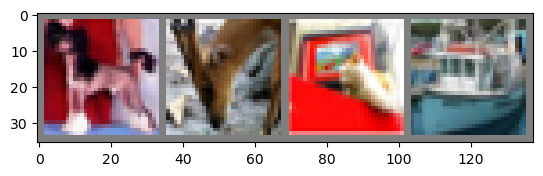

GroundTruth:  dog deer cat ship
Predicted:  frog frog car dog
Now showing feature maps for image 0


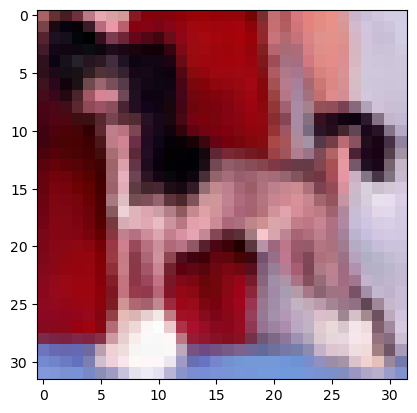

Layer 1 Feature Maps:
Size: 32


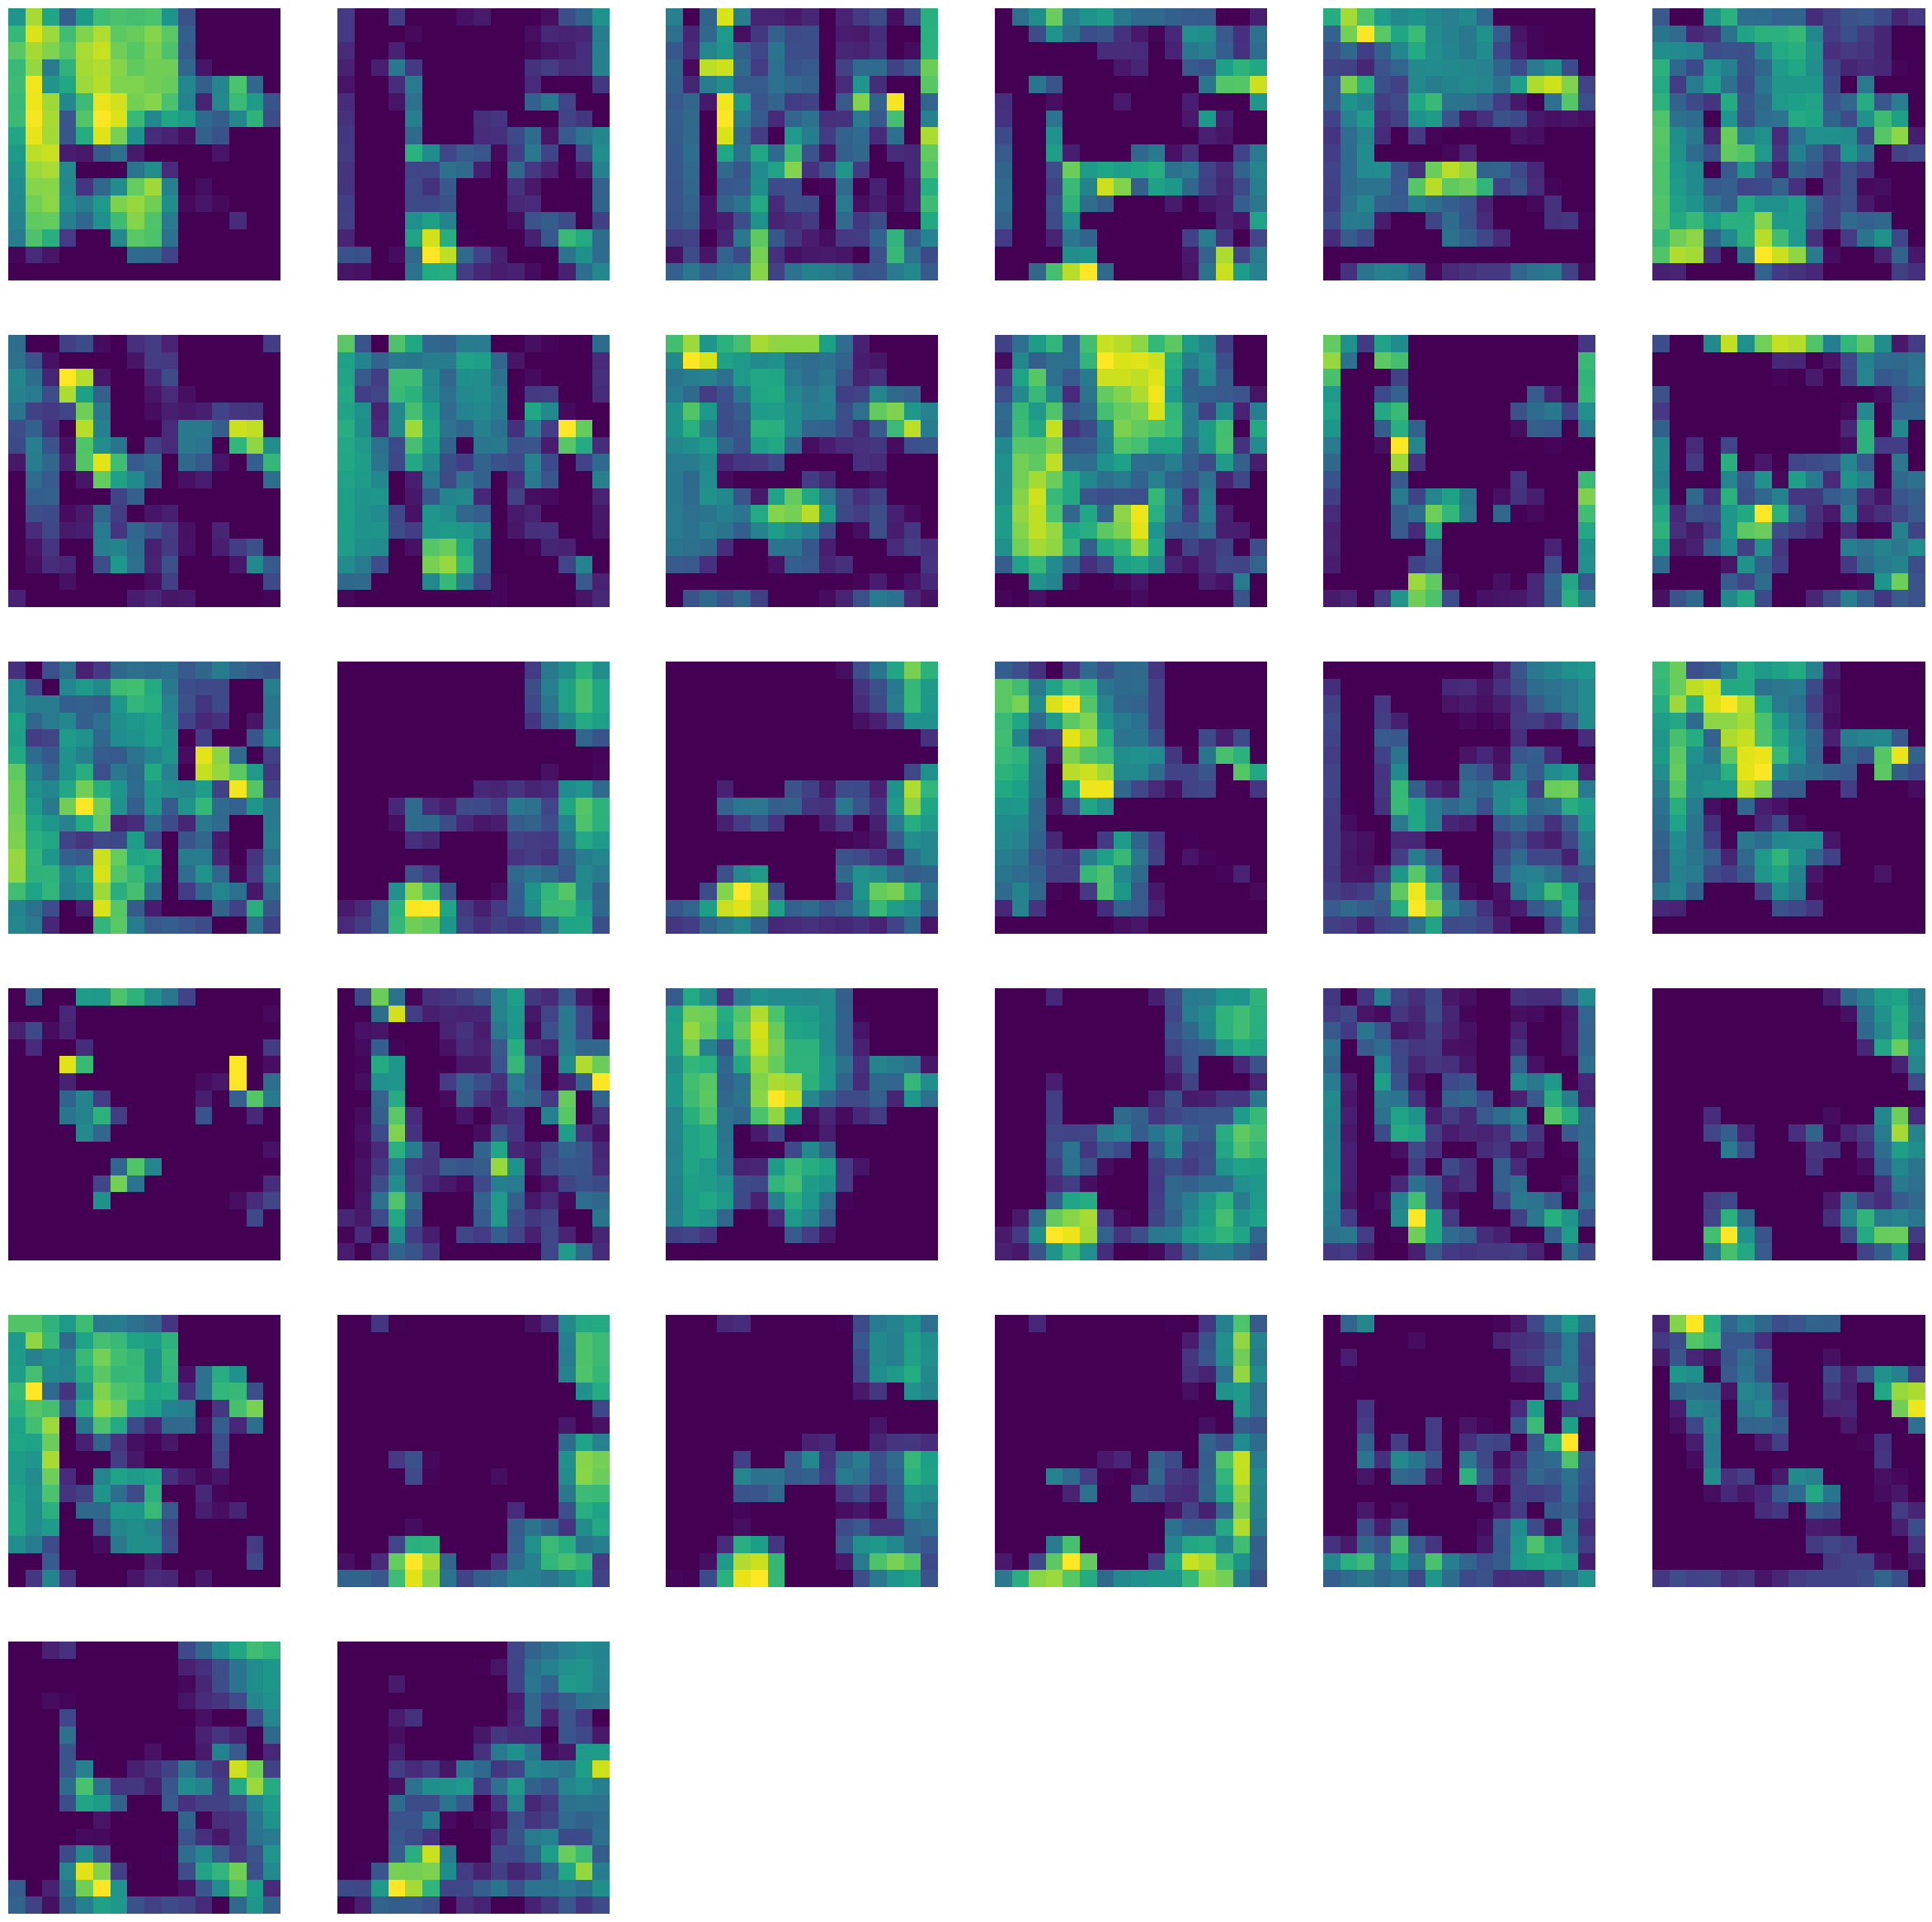

Layer 2 Feature Maps:
Size: 64


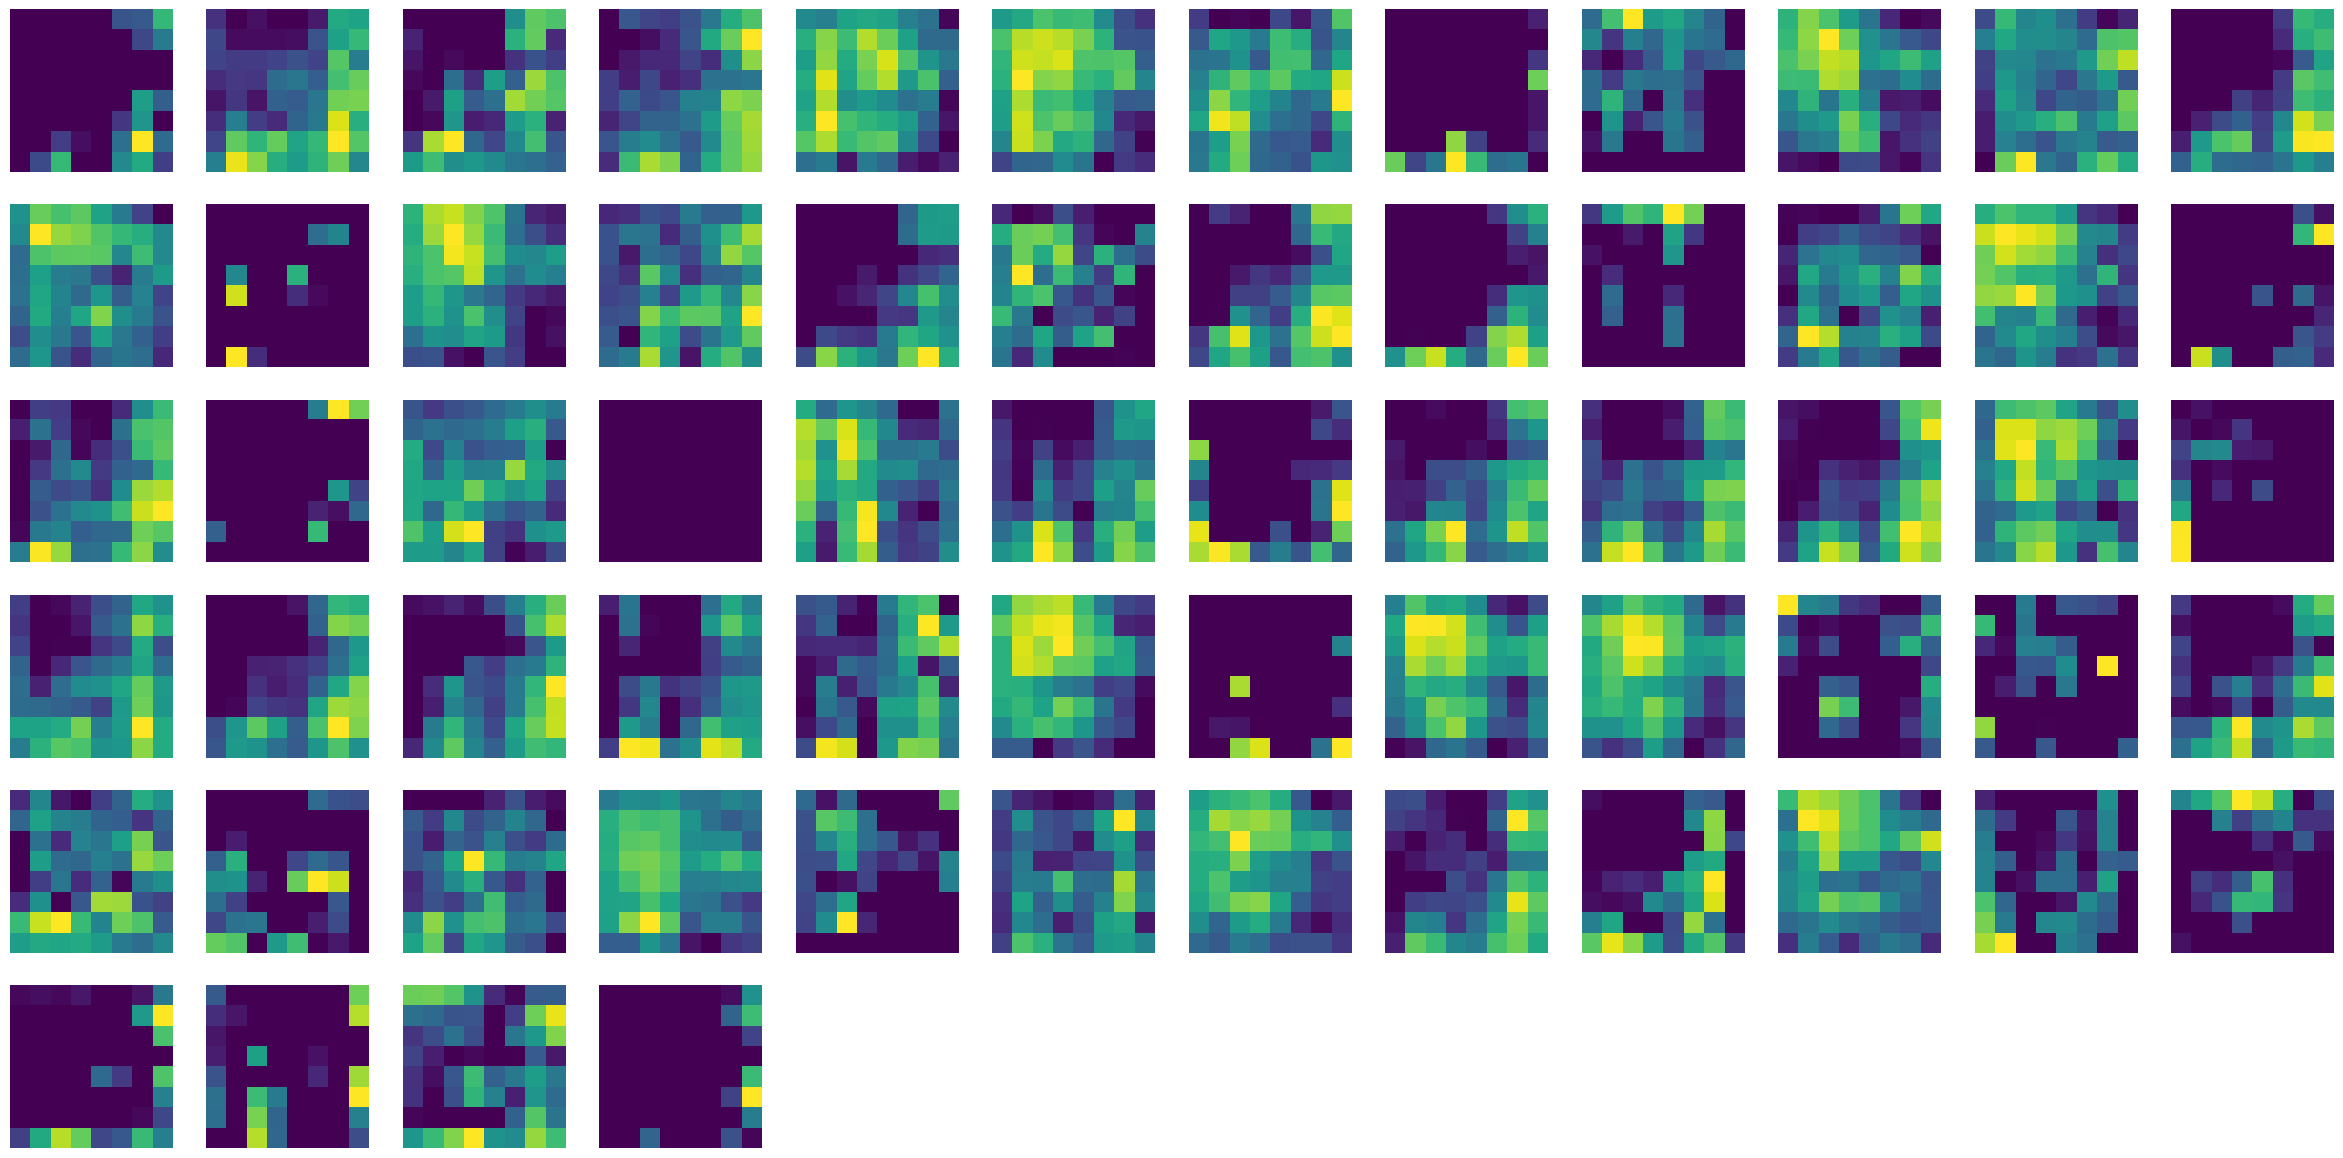

In [5]:
import matplotlib.pyplot as plt
import numpy as np


# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get num_display random images from the testing set
num_display = 4
dataiter = iter(testloader)
images, labels = next(dataiter)
images, labels = next(dataiter)
images = images[:num_display]
labels = labels[:num_display]

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]}' for j in range(4)))

# Switch the model to evaluation mode to disable dropout layers
net.eval()
# Pass images through the network to get predictions
outputs = net(images)
outputs = outputs[:num_display]
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]}' for j in range(4)))

# Extract and visualize feature maps from the convolutional layers
feature_maps_1, feature_maps_2 = net(images, return_feature_maps=True)
feature_maps_1 = feature_maps_1[:num_display]
feature_maps_2 = feature_maps_2[:num_display]

feature_map_image_id = 0
print(f"Now showing feature maps for image {feature_map_image_id}")
imshow(torchvision.utils.make_grid(images[feature_map_image_id]))

def plot_feature_maps(feature_maps, layer):
    # Plot feature maps of the first image in the batch
    plt.figure(figsize=(30, 30))
    print(f"Layer {layer} Feature Maps:")
    print(f"Size: {feature_maps.size(1)}")
    for i in range(feature_maps.size(1)):  # Iterate through all the filters
        plt.subplot(6*layer, 6*layer, i+1)  # Adjust the grid size according to the number of filters
        plt.imshow(feature_maps[0, i].detach().numpy())#, cmap='gray')
        plt.axis('off')
    plt.show()

plot_feature_maps(feature_maps_1, 1)
plot_feature_maps(feature_maps_2, 2)

## 1D CNNs

We can apply CNNs to data of any dimension. The kernels must always match the dimension of the input data.

<p style="text-align:center;">1D Convolution</p>
<img src="1dcnn.gif" width="750" align="center">


### PyTorch 1D CNN for ECG Signal Classification

The following code builds, trains and evaluates a 1D CNN for ECG signal classification on the MIT-BIH Arrhythmia Database (mitdb). It is part of the PhysioNet repository and is available through the WFDB (Waveform Database) Python package.
The data has been processed and saved as ECG_window_df.csv using the following script: https://github.com/manduchan/1D-CNN-for-ECG-Classification/blob/master/DF%20by%20ECG%20Window.py

Each sample (row) in the csv file is an ECG signals with 3600 readings. Each signal has been annotated by a clinician. In the original mitdb dataset there is an annotation label 'X' which denotes ECG events that are noisy and un-classifiable for the clinician. We're going to use a 1D CNN to perform binary classification, determining whether the signal is noisy or not. The csv file has a column labelled 'Results' which is 1 if the signal was classified as noisy ('X') and 0 otherwise. 

In [6]:
import pandas as pd
data = pd.read_csv('ECG_window_df.csv')

Number of X labelled samples: 80
Number of non-X labelled samples: 1000


Text(0.5, 1.0, 'Noisy ECG Signal')

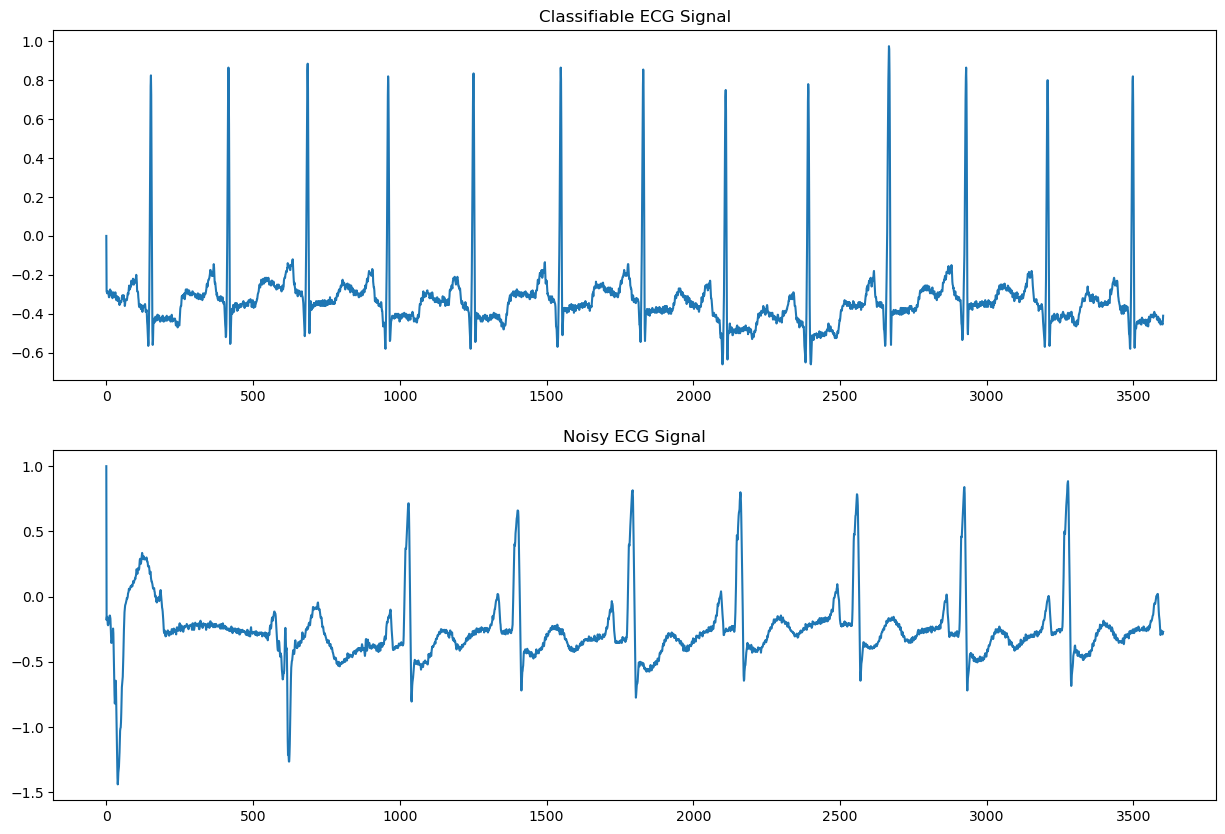

In [7]:
import matplotlib.pyplot as plt
import numpy as np

#Label data['Results']==1 when annotation 'X', else 0

df_target_1 = data[data['Results'] == 1] #get all 'X' samples
df_target_0 = data[data['Results'] == 0]

print(f"Number of X labelled samples: {len(df_target_1)}")
print(f"Number of non-X labelled samples: {len(df_target_0)}")

X_1_npy = df_target_1[df_target_1.columns[4:]].to_numpy()
X_0_npy = df_target_0[df_target_0.columns[4:]].to_numpy()

#Plot one normal signal sample and one noisy signal sample
X_mesh = np.linspace(0,X_1_npy.shape[1],X_1_npy.shape[1])
fig_e = plt.figure(figsize=(15,10))
axe_e0 = fig_e.add_subplot(211)
axe_e0.plot(X_mesh, X_0_npy[0])
axe_e0.set_title("Classifiable ECG Signal")
axe_e1 = fig_e.add_subplot(212)
axe_e1.plot(X_mesh, X_1_npy[1])
axe_e1.set_title("Noisy ECG Signal")

In [8]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, Dataset

'''
There are only 80 'X' samples in the dataset, 
so we want to split the dataset such that the number 
of these samples in the train and test sets aren't skewed
'''
# Split the subset with target=1 into training (60 samples) and testing sets (20 samples)
train_target_1, test_target_1 = train_test_split(df_target_1, train_size=60, test_size=len(df_target_1) - 60, shuffle=True, random_state=42)

# Split the subset with target=0 into training (75%) and testing sets (25%)
train_target_0, test_target_0 = train_test_split(df_target_0, train_size=0.75, shuffle=True, random_state=42)
#Reduce size of the data for faster training
#train_target_0 = train_target_0[:1000]
#test_target_0 = test_target_0[:1000]


# Concatenate the training and testing sets for both target values
train_df = pd.concat([train_target_1, train_target_0])
test_df = pd.concat([test_target_1, test_target_0])

#shuffle the train and test sets so that the targets aren't all 1s followed by 0s
train_df = train_df.sample(frac=1).reset_index(drop=True) 
test_df = test_df.sample(frac=1).reset_index(drop=True)

#separate features X and targets y from the dataset
X_tr = train_df[train_df.columns[5:]].to_numpy()
y_tr = train_df[train_df.columns[4]].to_numpy()
X_te = test_df[test_df.columns[5:]].to_numpy()
y_te = test_df[test_df.columns[4]].to_numpy()

'''
this step reshapes the X arrays from (num training samples, sample signal length) 
to (num training samples, sample signal length, 1). We do this because PyTorch
Conv layers are expecting one dimension of the input to represent the
number of channels. Since our data consists of one signal, we only have
one channel
'''
X_tr = np.expand_dims(X_tr, 2)
X_te = np.expand_dims(X_te, 2)

'''
PyTorch Conv1D expects input of shape (batch_size, num_channel, sample signal length).
So we swap axis 2 and 1
'''
X_tr = np.transpose(X_tr,(0,2,1))
X_te = np.transpose(X_te,(0,2,1))

#PyTorch uses tensors instead of numpy arrays
X_tr = torch.tensor(X_tr, dtype=torch.float64)
X_te = torch.tensor(X_te, dtype=torch.float64)
y_tr = torch.tensor(y_tr, dtype=torch.int16)
y_te = torch.tensor(y_te, dtype=torch.int16)

class EcgData(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

tr_set = EcgData(X_tr, y_tr)
te_set = EcgData(X_te, y_te)

batch_size = 100

tr_loader = DataLoader(dataset=tr_set, batch_size=batch_size, shuffle=True)
te_loader = DataLoader(dataset=te_set, batch_size=batch_size, shuffle=True)

In [9]:
import torch.nn.functional as F
import torch.nn as nn

#Define our 1D CNN model
class Ecg1DCnn(nn.Module):
    def __init__(self):
        super(Ecg1DCnn, self).__init__()
        self.conv1 = nn.Conv1d(1, 100, kernel_size=10)
        self.conv2 = nn.Conv1d(100, 100, kernel_size=10)
        self.pool1 = nn.MaxPool1d(kernel_size=3)
        self.conv3 = nn.Conv1d(100, 160, kernel_size=10)
        self.conv4 = nn.Conv1d(160, 160, kernel_size=10)
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1) #https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveAvgPool1d.html
        self.dropout = nn.Dropout(0.3) #https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html
        self.fc1 = nn.Linear(160, 1)

    def forward(self, x, return_features=False):
        print("Forward")
        print(x.shape)
        x = x.float()
        x = F.relu(self.conv1(x))
        x1 = x
        x = F.relu(self.conv2(x))
        x = self.pool1(x)
        x2 = x
        x = F.relu(self.conv3(x))
        x3 = x
        x = F.relu(self.conv4(x))
        x4 = x
        x = self.global_avg_pool(x)
        
        if return_features:
            return x1, x2, x3, x4
        
        x = x.view(x.size(0), -1) # flatten the output for the dropout layer
        x = self.dropout(x) 
        x = torch.sigmoid(self.fc1(x))
        return x

In [10]:
model = Ecg1DCnn()

# Setting up the loss function and optimizer
criterion = nn.BCELoss() #binary cross entropy: https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#Train the model
num_epochs = 10
for epoch in range(num_epochs):  # Loop over the dataset multiple times
    model.train()
    running_loss = 0.0
    for data in tr_loader:
        inputs, labels = data
        print(inputs.shape)
        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs[:,0], labels.float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(tr_loader.dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

#Test the model, evaluate the model's accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in te_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the testing set: {(100 * correct / total)}")

torch.Size([100, 1, 3600])
Forward
torch.Size([100, 1, 3600])
torch.Size([100, 1, 3600])
Forward
torch.Size([100, 1, 3600])
torch.Size([100, 1, 3600])
Forward
torch.Size([100, 1, 3600])
torch.Size([100, 1, 3600])
Forward
torch.Size([100, 1, 3600])
torch.Size([100, 1, 3600])
Forward
torch.Size([100, 1, 3600])
torch.Size([100, 1, 3600])
Forward
torch.Size([100, 1, 3600])
torch.Size([100, 1, 3600])
Forward
torch.Size([100, 1, 3600])


KeyboardInterrupt: 

Forward
torch.Size([1, 1, 3601])
Forward
torch.Size([1, 1, 3601])


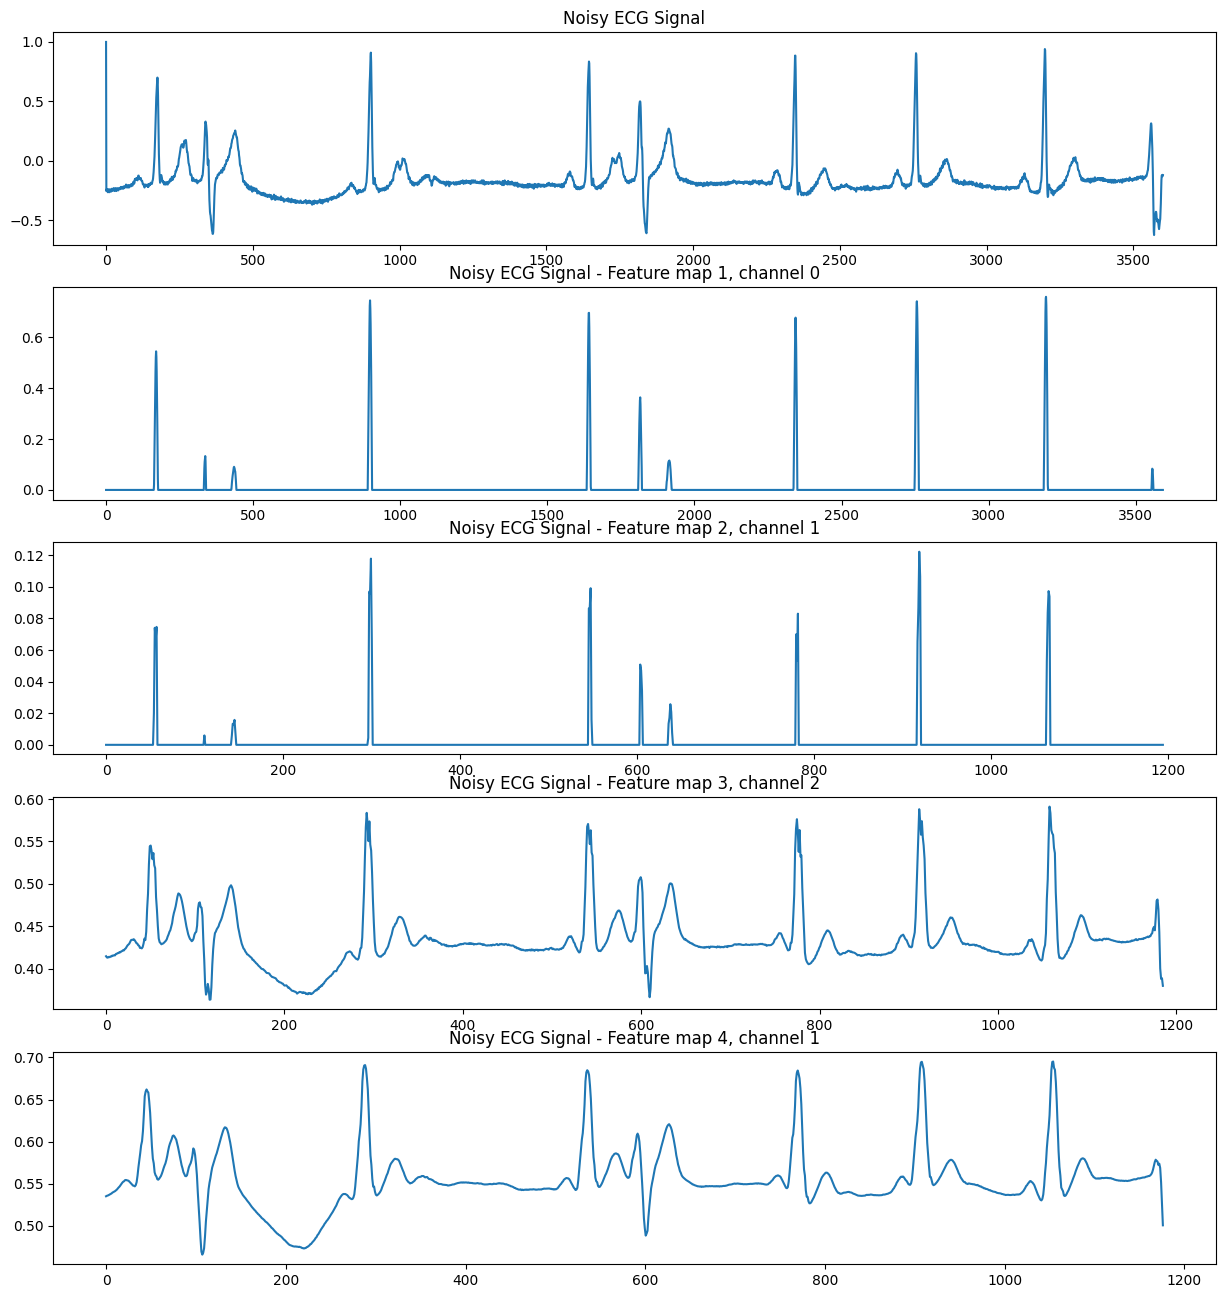

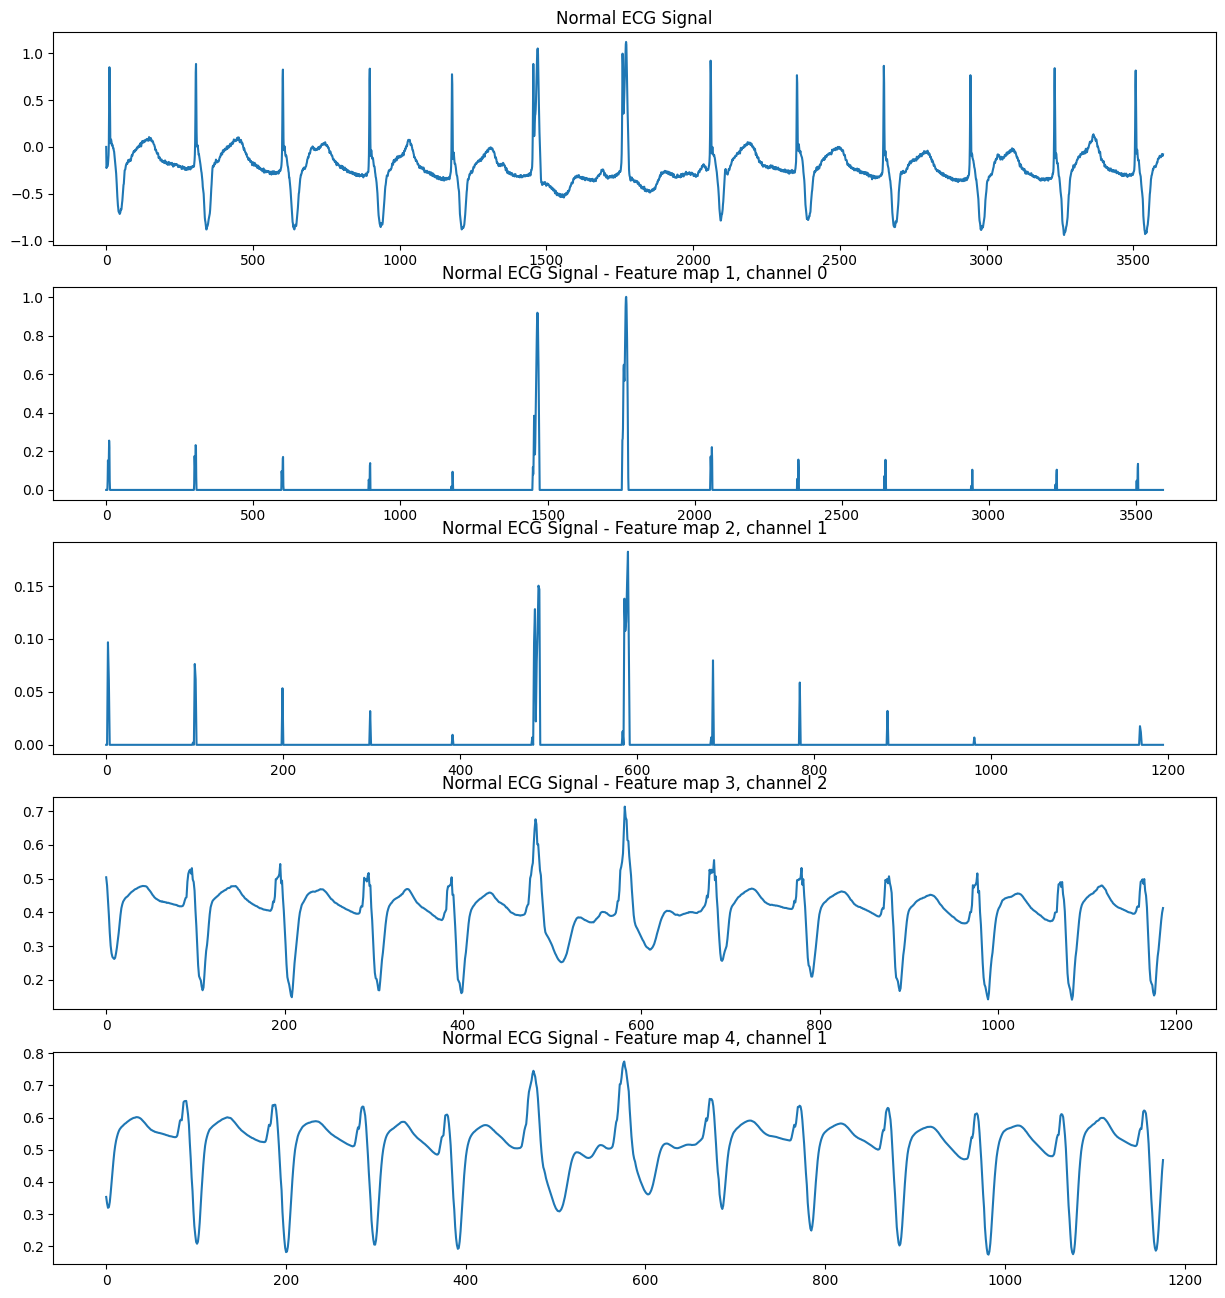

In [11]:
#Displays the feature maps when the model is applied to a noisy signal and a normal signal

x1 = train_target_1.iloc[0][train_target_1.columns[4:]].to_numpy()
x1 = np.expand_dims([x1], 2)
x1 = torch.tensor(x1, dtype=torch.float64)
x1 = np.transpose(x1,(0,2,1))

x0 = train_target_0.iloc[0][train_target_0.columns[4:]].to_numpy()
x0 = np.expand_dims([x0], 2)
x0 = torch.tensor(x0, dtype=torch.float64)
x0 = np.transpose(x0,(0,2,1))

def plot_cnn_features(x, f1, f2, f3, f4, title):
    fig = plt.figure(figsize=(15,16))
    
    ax1 = fig.add_subplot(511)
    x_mesh = np.linspace(0,x.shape[2],x.shape[2])
    ax1.plot(x_mesh, x[0,0,:])
    ax1.set_title(f"{title}")

    ax2 = fig.add_subplot(512)
    x_mesh = np.linspace(0,f1.shape[2],f1.shape[2])
    #often some channels of the feature map will be all 0s, so find a channel i that isn't all 0s
    i = torch.where(torch.any(f1[0,:,:]!=0, dim=1))[0][0].item()
    ax2.plot(x_mesh, f1[0,i,:].detach().numpy())
    ax2.set_title(f"{title} - Feature map 1, channel {i}")
    
    ax3 = fig.add_subplot(513)
    x_mesh = np.linspace(0,f2.shape[2],f2.shape[2])
    i = torch.where(torch.any(f2[0,:,:]!=0, dim=1))[0][0].item()
    ax3.plot(x_mesh, f2[0,i,:].detach().numpy())
    ax3.set_title(f"{title} - Feature map 2, channel {i}")
    
    ax4 = fig.add_subplot(514)
    x_mesh = np.linspace(0,f3.shape[2],f3.shape[2])
    i = torch.where(torch.any(f3[0,:,:]!=0, dim=1))[0][0].item()
    ax4.plot(x_mesh, f3[0,i,:].detach().numpy())
    ax4.set_title(f"{title} - Feature map 3, channel {i}")
    
    ax5 = fig.add_subplot(515)
    x_mesh = np.linspace(0,f4.shape[2],f4.shape[2])
    i = torch.where(torch.any(f4[0,:,:]!=0, dim=1))[0][0].item()
    ax5.plot(x_mesh, f4[0,i,:].detach().numpy())
    ax5.set_title(f"{title} - Feature map 4, channel {i}")
    
    
    
f1, f2, f3, f4 = model(x1, True)
plot_cnn_features(x1, f1, f2, f3, f4, "Noisy ECG Signal")
f1, f2, f3, f4 = model(x0, True)
plot_cnn_features(x0, f1, f2, f3, f4, "Normal ECG Signal")